In [55]:
import pandas as pd
#read in data using pandas
train_df = pd.read_csv("AQI_Delhi.csv",encoding='cp1252')
test_df = pd.read_csv("AQI_Delhi_Test.csv",encoding='cp1252')
#check data has been read in properly
train_df.tail()

,Date,SO2,NO2,O3,PM2.5,PM10,AT,WD,WS,RH,AQI1,AQI2,AQI3,AQI4,AQI5,DOW,DOM,DOY,MONTH,AQI
1192,15/07/2018,18.73,145.67,32.721887,165.65,375.88,25.19,85.08,0.96,48.53,335.266279,625.371304,528.871633,415.688367,615.547143,7,15,196,7,390.826835
1193,16/07/2018,19.61,135.03,15.914445,112.71,422.68,24.94,97.87,1.96,51.11,390.826835,335.266279,625.371304,528.871633,415.688367,1,16,197,7,830.700408
1194,17/07/2018,24.11,128.26,59.445802,463.68,713.95,23.76,175.26,1.88,49.45,830.700408,390.826835,335.266279,625.371304,528.871633,2,17,198,7,782.881739
1195,18/07/2018,20.35,197.55,84.779065,202.14,697.16,21.77,281.35,0.68,55.88,782.881739,830.700408,390.826835,335.266279,625.371304,3,18,199,7,688.028261
1196,19/07/2018,19.45,67.90,110.579462,238.60,631.05,22.62,284.02,1.14,36.16,688.028261,782.881739,830.700408,390.826835,335.266279,4,19,200,7,872.421837


In [56]:
#create a dataframe with all training data except the target column
train_X = train_df.drop(columns=['AQI','Date'])
test_X = test_df.drop(columns=['AQI','Date'])

#check that the target variable has been removed
train_X.head() 


,SO2,NO2,O3,PM2.5,PM10,AT,WD,WS,RH,AQI1,AQI2,AQI3,AQI4,AQI5,DOW,DOM,DOY,MONTH
0,14.93,79.48,10.17,83.02,482.61,30.16,263.99,1.50,31.26,475.049130,396.315696,326.702405,265.960000,233.431034,5,10,100,4
1,11.17,77.10,13.88,114.30,442.78,29.81,256.34,1.26,36.18,417.901739,475.049130,396.315696,326.702405,265.960000,6,11,101,4
2,28.10,85.62,13.12,251.78,671.70,29.92,160.78,0.97,36.42,746.352174,417.901739,475.049130,396.315696,326.702405,7,12,102,4
3,22.88,61.65,10.91,64.32,161.80,24.30,151.32,1.77,53.08,141.397315,746.352174,417.901739,475.049130,396.315696,1,13,103,4
4,14.95,53.87,15.89,110.57,247.32,24.91,118.04,2.01,58.09,267.807931,141.397315,746.352174,417.901739,475.049130,2,14,104,4


In [57]:
#create a dataframe with only the target column
train_y = train_df[['AQI']]
test_y = test_df[['AQI']]
date = test_df[['Date']]



#view dataframe
train_y.tail()

,AQI
1192,390.826835
1193,830.700408
1194,782.881739
1195,688.028261
1196,872.421837


In [58]:
from keras.models import Sequential
from keras.layers import Dense
#create model
model = Sequential()

#get number of columns in training data
n_cols = train_X.shape[1]

#add model layers
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

In [59]:
#compile model using mse as a measure of model performance
model.compile(optimizer='adam', loss='mean_squared_error')

In [60]:
from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=30)
#train model
model.fit(train_X, train_y, epochs=300, callbacks=[early_stopping_monitor])

Epoch 1/300
1197/1197 [==============================] - 0s 311us/step - loss: 194129.6141
Epoch 2/300
1197/1197 [==============================] - 0s 38us/step - loss: 77990.8083
Epoch 3/300
1197/1197 [==============================] - 0s 37us/step - loss: 40127.4395
Epoch 4/300
1197/1197 [==============================] - 0s 37us/step - loss: 37020.6604
Epoch 5/300
1197/1197 [==============================] - 0s 33us/step - loss: 35148.4257
Epoch 6/300
1197/1197 [==============================] - 0s 36us/step - loss: 33831.1676
Epoch 7/300
1197/1197 [==============================] - 0s 34us/step - loss: 32733.1573
Epoch 8/300
1197/1197 [==============================] - 0s 41us/step - loss: 31926.5429
Epoch 9/300
1197/1197 [==============================] - 0s 40us/step - loss: 31529.2819
Epoch 10/300
1197/1197 [==============================] - 0s 37us/step - loss: 31145.0486
Epoch 11/300
1197/1197 [==============================] - 0s 38us/step - loss: 30921.1622
Epoch 12/300
1197

1197/1197 [==============================] - 0s 39us/step - loss: 27005.6766
Epoch 93/300
1197/1197 [==============================] - 0s 35us/step - loss: 26754.8563
Epoch 94/300
1197/1197 [==============================] - 0s 34us/step - loss: 26574.7789
Epoch 95/300
1197/1197 [==============================] - 0s 38us/step - loss: 27119.6419
Epoch 96/300
1197/1197 [==============================] - 0s 33us/step - loss: 26516.7393
Epoch 97/300
1197/1197 [==============================] - 0s 39us/step - loss: 26543.8592
Epoch 98/300
1197/1197 [==============================] - 0s 52us/step - loss: 26423.9508
Epoch 99/300
1197/1197 [==============================] - 0s 52us/step - loss: 26664.9024
Epoch 100/300
1197/1197 [==============================] - 0s 51us/step - loss: 26643.9041
Epoch 101/300
1197/1197 [==============================] - 0s 64us/step - loss: 26311.3346
Epoch 102/300
1197/1197 [==============================] - 0s 58us/step - loss: 26499.3120
Epoch 103/300
1197/1

1197/1197 [==============================] - 0s 41us/step - loss: 25419.0716
Epoch 183/300
1197/1197 [==============================] - 0s 42us/step - loss: 25234.5367
Epoch 184/300
1197/1197 [==============================] - 0s 39us/step - loss: 25134.0887
Epoch 185/300
1197/1197 [==============================] - 0s 37us/step - loss: 25385.9553
Epoch 186/300
1197/1197 [==============================] - 0s 40us/step - loss: 25105.2609
Epoch 187/300
1197/1197 [==============================] - 0s 42us/step - loss: 25265.7419
Epoch 188/300
1197/1197 [==============================] - 0s 43us/step - loss: 25159.2400
Epoch 189/300
1197/1197 [==============================] - 0s 34us/step - loss: 25063.5316
Epoch 190/300
1197/1197 [==============================] - 0s 42us/step - loss: 25263.2675
Epoch 191/300
1197/1197 [==============================] - 0s 47us/step - loss: 25219.7024
Epoch 192/300
1197/1197 [==============================] - 0s 39us/step - loss: 25057.4262
Epoch 193/300

1197/1197 [==============================] - 0s 36us/step - loss: 24225.6979
Epoch 273/300
1197/1197 [==============================] - 0s 49us/step - loss: 24372.5856
Epoch 274/300
1197/1197 [==============================] - 0s 46us/step - loss: 24476.9264
Epoch 275/300
1197/1197 [==============================] - 0s 36us/step - loss: 24256.7284
Epoch 276/300
1197/1197 [==============================] - 0s 35us/step - loss: 24063.2928
Epoch 277/300
1197/1197 [==============================] - 0s 33us/step - loss: 24136.0909
Epoch 278/300
1197/1197 [==============================] - 0s 36us/step - loss: 24036.0077
Epoch 279/300
1197/1197 [==============================] - 0s 37us/step - loss: 24309.5598
Epoch 280/300
1197/1197 [==============================] - 0s 33us/step - loss: 24578.7828
Epoch 281/300
1197/1197 [==============================] - 0s 32us/step - loss: 24076.8461
Epoch 282/300
1197/1197 [==============================] - 0s 38us/step - loss: 24126.7593
Epoch 283/300

In [61]:
#example on how to use our newly trained model on how to make predictions on unseen data (we will pretend our new data is saved in a dataframe called 'test_X').
test_y_predictions = model.predict(test_X)

In [62]:
l = []
for i in range(13):
    l.append(((test_y["AQI"][i] - test_y_predictions[i])/test_y["AQI"][i])*100)
    print(str(test_y["AQI"][i]) +" " + str(test_y_predictions[i]) + " " + str(l[i]))

788.9183673469389 [899.5737] [-14.026208]
654.2379591836731 [622.03656] [4.9219728]
592.5346938775509 [579.45416] [2.2075512]
618.759591836735 [430.9292] [30.355953]
568.1079591836731 [449.28024] [20.916399]
384.360506329114 [486.84015] [-26.662376]
399.310759493671 [492.42416] [-23.318531]
316.893720930233 [446.48145] [-40.893127]
486.69956521739095 [484.20978] [0.51156336]
496.74304347826103 [488.48032] [1.6633803]
782.881739130435 [607.70984] [22.375267]
688.028260869565 [656.22815] [4.621919]
614.423913043478 [553.32837] [9.943545]


In [63]:
l.sort(reverse = True) 
print(l)

[array([30.355953], dtype=float32), array([22.375267], dtype=float32), array([20.916399], dtype=float32), array([9.943545], dtype=float32), array([4.9219728], dtype=float32), array([4.621919], dtype=float32), array([2.2075512], dtype=float32), array([1.6633803], dtype=float32), array([0.51156336], dtype=float32), array([-14.026208], dtype=float32), array([-23.318531], dtype=float32), array([-26.662376], dtype=float32), array([-40.893127], dtype=float32)]


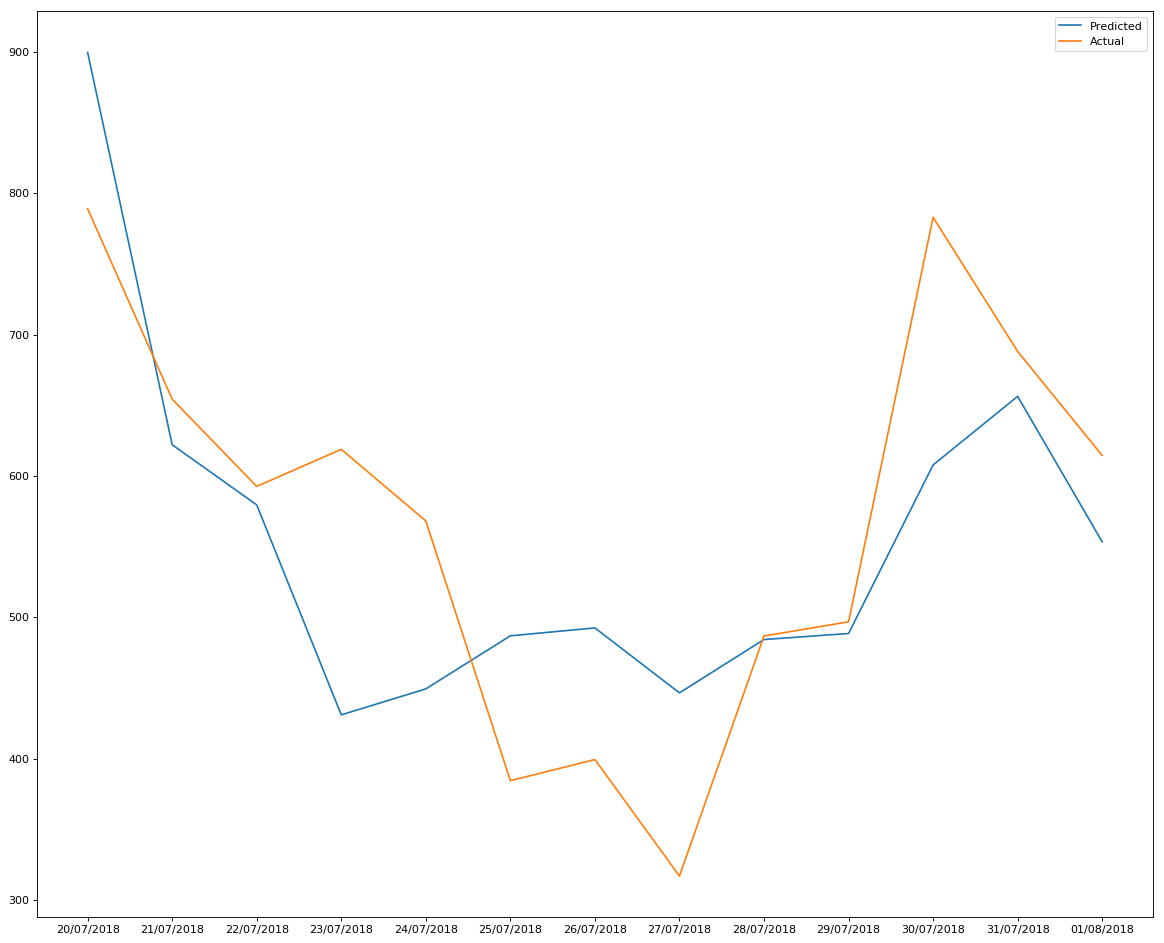

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 15), dpi=80, facecolor='w', edgecolor='k')
datelist = []
predictionlist = []
actuallist = []
for i in range(13):
    datelist.append(date['Date'][i])
    predictionlist.append(test_y_predictions[i][0])
    actuallist.append(test_y['AQI'][i])
    
plt.plot(datelist, predictionlist)
plt.plot(datelist, actuallist)
plt.legend(['Predicted', 'Actual'])
plt.show()

In [50]:
#training a new model on the same data to show the effect of increasing model capacity

#create model
model_mc = Sequential()

#add model layers
model_mc.add(Dense(200, activation='relu', input_shape=(n_cols,)))
model_mc.add(Dense(200, activation='relu'))
model_mc.add(Dense(200, activation='relu'))
model_mc.add(Dense(1))

#compile model using mse as a measure of model performance
model_mc.compile(optimizer='adam', loss='mean_squared_error')
#train model
model_mc.fit(train_X, train_y, epochs=300, callbacks=[early_stopping_monitor])

Epoch 1/300
1197/1197 [==============================] - 0s 358us/step - loss: 53976.1211
Epoch 2/300
1197/1197 [==============================] - 0s 61us/step - loss: 29086.7099
Epoch 3/300
1197/1197 [==============================] - 0s 58us/step - loss: 28702.4874
Epoch 4/300
1197/1197 [==============================] - 0s 59us/step - loss: 29980.1679
Epoch 5/300
1197/1197 [==============================] - 0s 60us/step - loss: 31267.0047
Epoch 6/300
1197/1197 [==============================] - 0s 60us/step - loss: 28600.6378
Epoch 7/300
1197/1197 [==============================] - 0s 65us/step - loss: 29123.0170
Epoch 8/300
1197/1197 [==============================] - 0s 64us/step - loss: 28182.5190
Epoch 9/300
1197/1197 [==============================] - 0s 63us/step - loss: 28502.2252
Epoch 10/300
1197/1197 [==============================] - 0s 69us/step - loss: 27537.6323
Epoch 11/300
1197/1197 [==============================] - 0s 63us/step - loss: 27246.6978
Epoch 12/300
1197/

1197/1197 [==============================] - 0s 67us/step - loss: 12887.9608
Epoch 93/300
1197/1197 [==============================] - 0s 117us/step - loss: 12307.1666
Epoch 94/300
1197/1197 [==============================] - 0s 101us/step - loss: 10995.4996
Epoch 95/300
1197/1197 [==============================] - 0s 87us/step - loss: 10994.4880
Epoch 96/300
1197/1197 [==============================] - 0s 57us/step - loss: 10824.0491
Epoch 97/300
1197/1197 [==============================] - 0s 57us/step - loss: 10394.8605
Epoch 98/300
1197/1197 [==============================] - 0s 68us/step - loss: 10016.2640
Epoch 99/300
1197/1197 [==============================] - 0s 72us/step - loss: 10726.9524
Epoch 100/300
1197/1197 [==============================] - 0s 86us/step - loss: 10315.5386
Epoch 101/300
1197/1197 [==============================] - 0s 63us/step - loss: 9760.3169
Epoch 102/300
1197/1197 [==============================] - 0s 59us/step - loss: 8597.9088
Epoch 103/300
1197/1

1197/1197 [==============================] - 0s 62us/step - loss: 2006.6764
Epoch 184/300
1197/1197 [==============================] - 0s 63us/step - loss: 2116.9376
Epoch 185/300
1197/1197 [==============================] - 0s 66us/step - loss: 1822.7328
Epoch 186/300
1197/1197 [==============================] - 0s 69us/step - loss: 1566.1274
Epoch 187/300
1197/1197 [==============================] - 0s 74us/step - loss: 1242.9643
Epoch 188/300
1197/1197 [==============================] - 0s 102us/step - loss: 1093.1100
Epoch 189/300
1197/1197 [==============================] - 0s 90us/step - loss: 1381.6807
Epoch 190/300
1197/1197 [==============================] - 0s 58us/step - loss: 1357.4182
Epoch 191/300
1197/1197 [==============================] - 0s 60us/step - loss: 1651.4116
Epoch 192/300
1197/1197 [==============================] - 0s 65us/step - loss: 1431.3994
Epoch 193/300
1197/1197 [==============================] - 0s 63us/step - loss: 1407.0905
Epoch 194/300
1197/1197

1197/1197 [==============================] - 0s 90us/step - loss: 1979.1400
Epoch 275/300
1197/1197 [==============================] - 0s 58us/step - loss: 1569.8350
Epoch 276/300
1197/1197 [==============================] - 0s 59us/step - loss: 2053.4180
Epoch 277/300
1197/1197 [==============================] - 0s 66us/step - loss: 2736.8878
Epoch 278/300
1197/1197 [==============================] - 0s 59us/step - loss: 2922.6047
Epoch 279/300
1197/1197 [==============================] - 0s 62us/step - loss: 2616.7360
Epoch 280/300
1197/1197 [==============================] - 0s 61us/step - loss: 1798.0550
Epoch 281/300
1197/1197 [==============================] - 0s 87us/step - loss: 992.3790
Epoch 282/300
1197/1197 [==============================] - 0s 61us/step - loss: 974.1639
Epoch 283/300
1197/1197 [==============================] - 0s 81us/step - loss: 730.0358
Epoch 284/300
1197/1197 [==============================] - 0s 77us/step - loss: 494.8791
Epoch 285/300
1197/1197 [===

In [51]:
#example on how to use our newly trained model on how to make predictions on unseen data (we will pretend our new data is saved in a dataframe called 'test_X').
test_y_predictions = model_mc.predict(test_X)

In [52]:
l = []
for i in range(13):
    l.append(((test_y["AQI"][i] - test_y_predictions[i])/test_y["AQI"][i])*100)
    print(str(test_y["AQI"][i]) +" " + str(test_y_predictions[i]) + " " + str(l[i]))

788.9183673469389 [1943.4957] [-146.34941]
654.2379591836731 [341.8707] [47.74521]
592.5346938775509 [707.4289] [-19.390295]
618.759591836735 [632.4739] [-2.2164173]
568.1079591836731 [425.54623] [25.094128]
384.360506329114 [527.71716] [-37.297447]
399.310759493671 [576.8414] [-44.45926]
316.893720930233 [496.05096] [-56.535442]
486.69956521739095 [387.91635] [20.296547]
496.74304347826103 [387.51303] [21.989239]
782.881739130435 [772.85583] [1.2806377]
688.028260869565 [552.82166] [19.651316]
614.423913043478 [713.8517] [-16.18228]


In [53]:
l.sort(reverse = True) 
print(l)

[array([47.74521], dtype=float32), array([25.094128], dtype=float32), array([21.989239], dtype=float32), array([20.296547], dtype=float32), array([19.651316], dtype=float32), array([1.2806377], dtype=float32), array([-2.2164173], dtype=float32), array([-16.18228], dtype=float32), array([-19.390295], dtype=float32), array([-37.297447], dtype=float32), array([-44.45926], dtype=float32), array([-56.535442], dtype=float32), array([-146.34941], dtype=float32)]


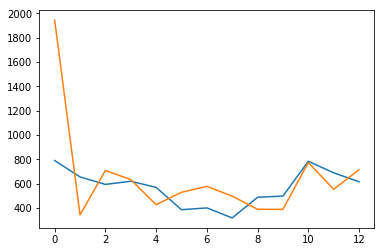

In [54]:
import matplotlib.pyplot as plt
import numpy as np
datelist = []
predictionlist = []
actuallist = []
for i in range(13):
    datelist.append(i)
    predictionlist.append(test_y_predictions[i][0])
    actuallist.append(test_y['AQI'][i])
x = np.arange(10)

plt.plot(datelist, actuallist)
plt.plot(datelist, predictionlist)
plt.show()